In [153]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [154]:
# Import our input dataset
file_path = Path('./Resources/combine.csv')
combine_df = pd.read_csv(file_path)
combine_df.head()

,Name,Steam_Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Global_Sales,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime
0,Wii Sports,NaN,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NaN,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,NaN,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,NaN,NaN,NaN,NaN,NaN
3,PlayerUnknown's Battlegrounds,PLAYERUNKNOWN'S BATTLEGROUNDS,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,496184.0,487076.0,22938.0,12434.0
4,Wii Sports Resort,NaN,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,NaN,NaN,NaN,NaN,NaN


In [155]:
# combine_df['Global_Sales'] = combine_df['Global_Sales']*1000000
# combine_df.head()

In [156]:
combine_df.count()

Name                55792
Steam_Name           7106
basename            55792
Genre               55792
ESRB_Rating         23623
Platform            55792
Publisher           55792
Developer           55775
Critic_Score         6536
User_Score            335
Global_Sales        19415
Positive_ratings     7106
Negative_ratings     7106
Average_playtime     7106
Median_playtime         8
dtype: int64

In [157]:
# Drop columns:
combine_df = combine_df.drop(['Name', 'Median_playtime', 'User_Score', 'ESRB_Rating', 'Critic_Score'], axis = 1)
combine_df.head()

,Steam_Name,basename,Genre,Platform,Publisher,Developer,Global_Sales,Positive_ratings,Negative_ratings,Average_playtime
0,NaN,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN
1,NaN,super-mario-bros,Platform,NES,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN
2,NaN,mario-kart-wii,Racing,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN
3,PLAYERUNKNOWN'S BATTLEGROUNDS,playerunknowns-battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,NaN,496184.0,487076.0,22938.0
4,NaN,wii-sports-resort,Sports,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN


In [158]:
combine_df.count()

Steam_Name           7106
basename            55792
Genre               55792
Platform            55792
Publisher           55792
Developer           55775
Global_Sales        19415
Positive_ratings     7106
Negative_ratings     7106
Average_playtime     7106
dtype: int64

In [159]:
# Find null value
for column in combine_df.columns:
    print(f'Column {column} has {combine_df[column].isnull().sum()} null values')

Column Steam_Name has 48686 null values
Column basename has 0 null values
Column Genre has 0 null values
Column Platform has 0 null values
Column Publisher has 0 null values
Column Developer has 17 null values
Column Global_Sales has 36377 null values
Column Positive_ratings has 48686 null values
Column Negative_ratings has 48686 null values
Column Average_playtime has 48686 null values


In [160]:
combine_df = combine_df.dropna()
combine_df.count()

Steam_Name          1665
basename            1665
Genre               1665
Platform            1665
Publisher           1665
Developer           1665
Global_Sales        1665
Positive_ratings    1665
Negative_ratings    1665
Average_playtime    1665
dtype: int64

In [161]:
# Group Genre and sum
genre_combine_df = combine_df.groupby('Genre').sum()[['Global_Sales', 'Positive_ratings', 'Negative_ratings', 'Average_playtime']]
#genre_combine_df = genre_combine_df['Global_Sales'].map("{:,}".format)
# genre_combine_df = genre_combine_df.style.format({'Global_Sales': "{:,}",
#                                                  'Positive_ratings': "{:,}",
#                                                  'Negative_ratings': "{:,}",
#                                                  'Average_playtime': "{:,}"})
genre_combine_df = genre_combine_df.sort_values(by=['Global_Sales'], ascending=False)  
genre_combine_df

,Global_Sales,Positive_ratings,Negative_ratings,Average_playtime
Genre,,,,
Action,227.89,4926987.0,1122979.0,220759.0
Shooter,136.08,6487459.0,1659015.0,187304.0
Role-Playing,89.89,2503897.0,394340.0,226253.0
Adventure,40.66,696782.0,69803.0,48442.0
Racing,38.31,286901.0,71664.0,41945.0
Sports,29.28,120197.0,125846.0,69210.0
Fighting,23.54,250062.0,76635.0,39240.0
Action-Adventure,16.57,1315209.0,297399.0,59008.0
Platform,13.99,183268.0,27502.0,13462.0


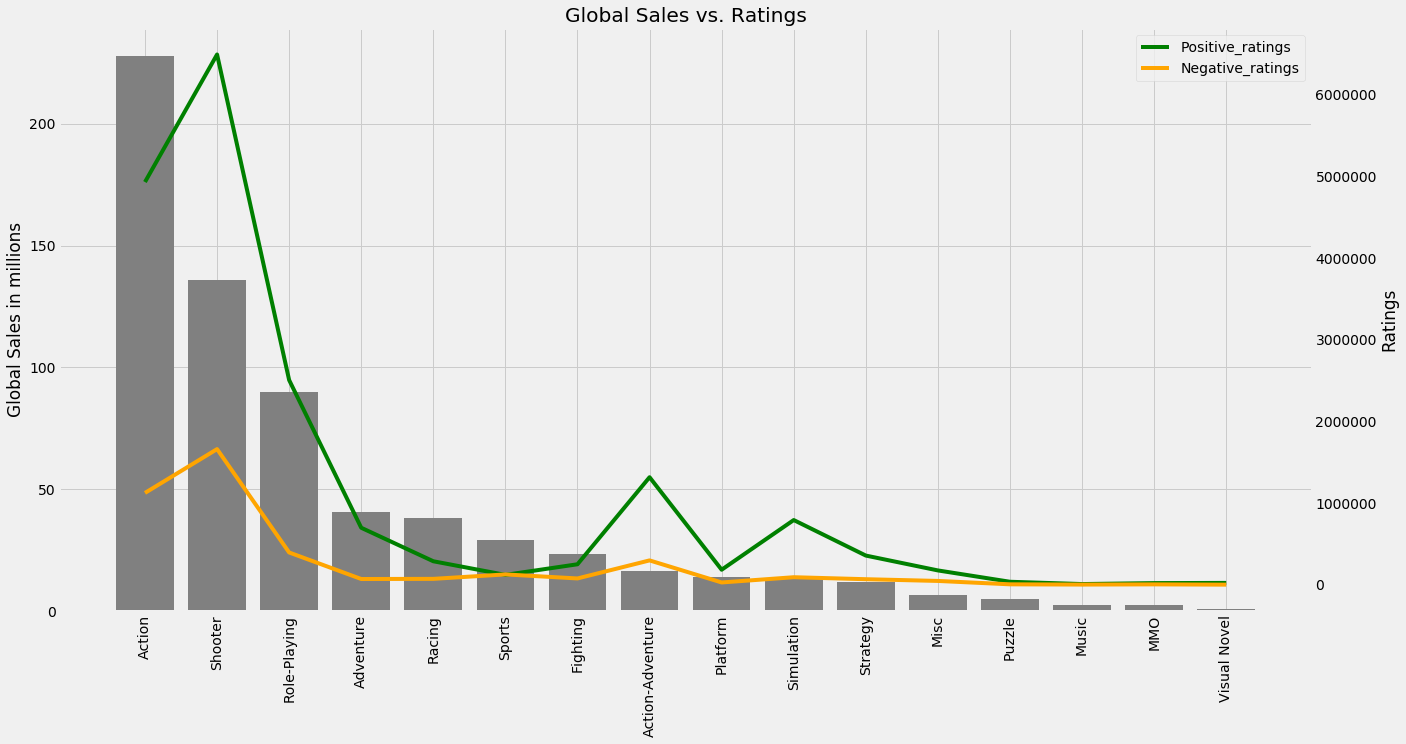

In [194]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.bar(genre_combine_df.index, genre_combine_df.Global_Sales, color='gray', label='Global Sales in millions')
ax2.plot(genre_combine_df.Positive_ratings, color='green', label = 'Positive_ratings')
ax2.plot(genre_combine_df.Negative_ratings, color='orange', label = 'Negative_ratings')
ax2.grid(b=False) # turn off grid #2
ax1.set_title('Global Sales vs. Ratings')
ax1.set_ylabel('Global Sales in millions')
ax2.set_ylabel('Ratings')
plt.legend(loc="upper right")